In [76]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import time as time
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score



In [6]:
data = pd.read_csv("all.csv",header=None)

In [7]:
data.shape

(3000, 785)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


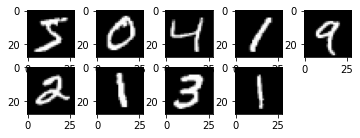

In [53]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
for i in range(9):
    plt.subplot(4,5, 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [54]:
x_train = x_train.reshape((x_train.shape[0],28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [56]:
x_train=x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [57]:
x_train /= 255
x_test /= 255

print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX = scaler.fit_transform(x_train)
testX = scaler.fit_transform(x_test)
print(trainX.shape)
print(testX.shape)

(60000, 784)
(10000, 784)


In [62]:

from sklearn.decomposition import PCA
pca = PCA(n_components=784, random_state=0)
train_pca = pca.fit_transform(trainX, y_train)
test_pca = pca.fit_transform(testX, y_test)

In [63]:
colors = ["#476A2A","#7851B8",'#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E', 'blue']

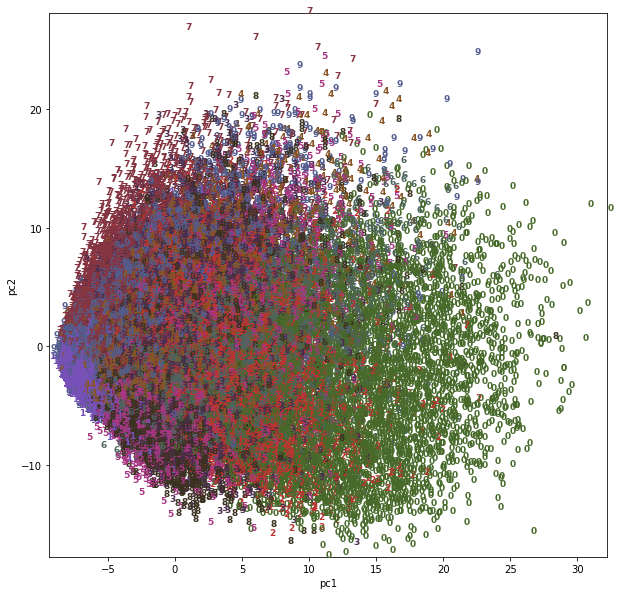

In [66]:
plt.figure(figsize=(10,10))
plt.xlim(train_pca[:,0].min(), train_pca[:,0].max())
plt.ylim(train_pca[:,1].min(), train_pca[:,1].max())
for i in range(len(trainX)):
    plt.text(train_pca[i,0], train_pca[i,1], str(y_train[i]),
             color = colors[y_train[i]],
            fontdict={'weight':'bold', 'size':9})
plt.xlabel("pc1")
plt.ylabel("pc2")
# plt.text(15, 25, str("PCA time: {}".format(time()-t)),
#          bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#          fontsize=9)
plt.show()

In [67]:
km = KMeans(n_clusters=10, random_state=0)
km = km.fit(train_pca)
labels_km = km.labels_
clusters_km = km.predict(test_pca)

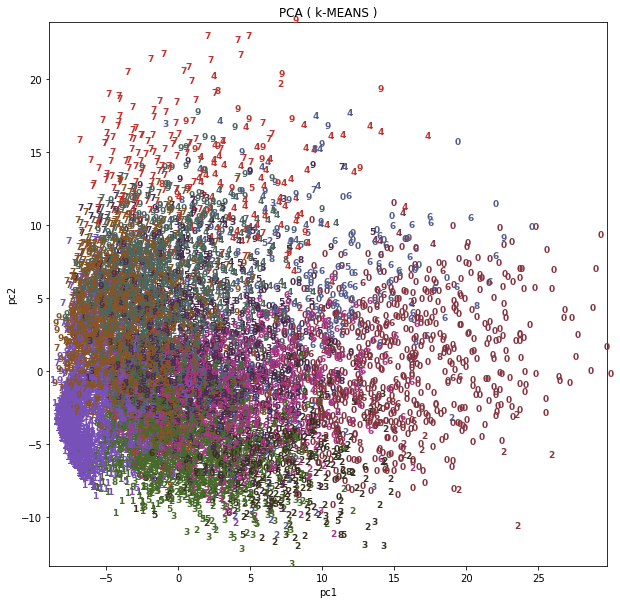

In [71]:
plt.figure(figsize=(10,10))
plt.xlim(test_pca[:,0].min(), test_pca[:,0].max())
plt.ylim(test_pca[:,1].min(), test_pca[:,1].max())
for i in range(len(y_test)):
    plt.text(test_pca[i,0], test_pca[i,1], str(y_test[i]),
             color = colors[clusters_km[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA ( k-MEANS )')
plt.xlabel("pc1")
plt.ylabel("pc2")
# plt.text(15, 25, str("k-MEANS time: {}".format(time()-t)),
#          bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#          fontsize=9)
plt.show()

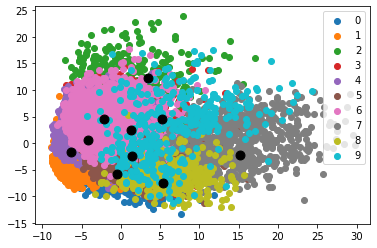

In [72]:
#Getting unique labels
 
u_labels = np.unique(clusters_km)
centroids = km.cluster_centers_
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(test_pca[clusters_km == i , 0] , test_pca[clusters_km == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [73]:
from sklearn import metrics
report_trainning=metrics.confusion_matrix(y_test, clusters_km) # due to batching we need to make this the input to confusion matrix
# sklearn.metrics.confusion_matrix
report_trainning
cm_df_trainning = pd.DataFrame(report_trainning,
                     index = ['0','1','2','3','4','5','6','7','8','9'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm_df_trainning

,0,1,2,3,4,5,6,7,8,9
0,19,13,0,140,11,50,33,622,63,29
1,72,1052,0,6,0,3,0,0,1,1
2,205,170,3,44,1,208,28,20,190,163
3,257,193,3,489,12,20,3,1,18,14
4,3,84,74,34,81,19,650,9,0,28
5,155,125,1,339,167,12,53,4,25,11
6,10,62,0,7,0,683,7,32,60,97
7,29,147,149,37,550,1,112,0,0,3
8,349,127,2,302,100,6,51,9,11,17
9,11,57,19,58,366,1,473,4,0,20


In [75]:

print ("Accuracy Score of Kmeans testing set: {:.2f}".format(accuracy_score(y_test, clusters_km)))
print ("ARI of Kmeans testing set: {:.2f}".format(adjusted_rand_score(y_test, clusters_km)))

Accuracy Score of Kmeans testing set: 0.17
ARI of Kmeans testing set: 0.28


In [77]:
km_5 = KMeans(n_clusters=5, random_state=0)
km_5 = km_5.fit(train_pca)
labels_km_5 = km_5.labels_
clusters_km_5 = km_5.predict(test_pca)

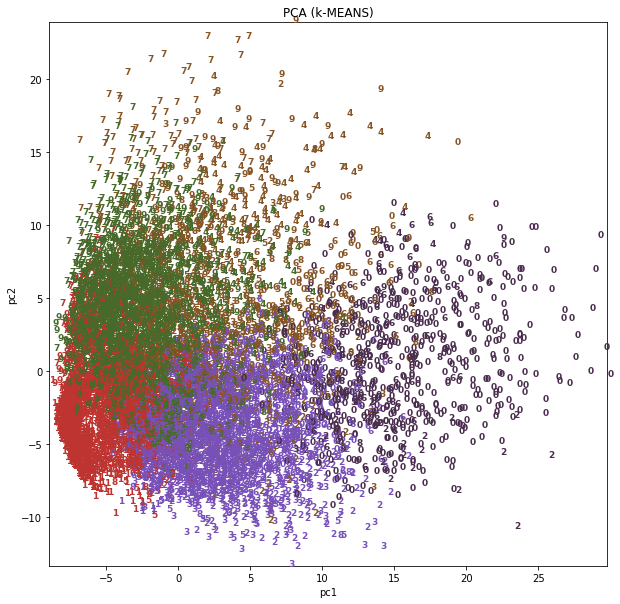

In [78]:
plt.figure(figsize=(10,10))
plt.xlim(test_pca[:,0].min(), test_pca[:,0].max())
plt.ylim(test_pca[:,1].min(), test_pca[:,1].max())
for i in range(len(y_test)):
    plt.text(test_pca[i,0], test_pca[i,1], str(y_test[i]),
             color = colors[clusters_km_5[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA (k-MEANS)')
plt.xlabel("pc1")
plt.ylabel("pc2")
# plt.text(15, 25, str("k-MEANS time: {}".format(time()-t)),
#          bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#          fontsize=9)
plt.show()

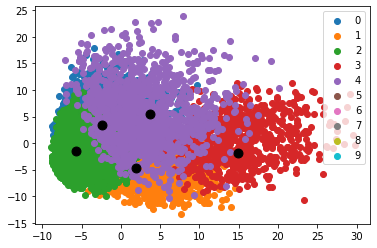

In [79]:
#Getting unique labels
 
u_labels_5 = np.unique(clusters_km_5)
centroids_5 = km_5.cluster_centers_
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(test_pca[clusters_km_5 == i , 0] , test_pca[clusters_km_5 == i , 1] , label = i)
plt.scatter(centroids_5[:,0] , centroids_5[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [80]:
report_trainning=metrics.confusion_matrix(y_test, clusters_km_5) # due to batching we need to make this the input to confusion matrix
# sklearn.metrics.confusion_matrix
report_trainning
cm_df_trainning = pd.DataFrame(report_trainning,
                     index = ['0','1','2','3','4','5','6','7','8','9'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm_df_trainning

,0,1,2,3,4,5,6,7,8,9
0,14,268,17,614,67,0,0,0,0,0
1,0,17,1115,0,3,0,0,0,0,0
2,24,590,206,26,186,0,0,0,0,0
3,29,403,359,1,218,0,0,0,0,0
4,657,19,123,11,172,0,0,0,0,0
5,257,282,214,6,133,0,0,0,0,0
6,6,678,70,86,118,0,0,0,0,0
7,695,11,196,1,125,0,0,0,0,0
8,226,279,295,13,161,0,0,0,0,0
9,775,9,95,5,125,0,0,0,0,0


In [81]:
print ("Accuracy Score of Kmeans testing set: {:.2f}".format(accuracy_score(y_test, clusters_km_5)))
print ("ARI of Kmeans testing set: {:.2f}".format(adjusted_rand_score(y_test, clusters_km_5)))

Accuracy Score of Kmeans testing set: 0.04
ARI of Kmeans testing set: 0.19


In [82]:
# trainning and validation data
all_data=pd.read_csv('all.csv',index_col=False,header=None)
shuffled_data=all_data.sample(frac = 1)
# feature=pd.read_csv('features.csv',index_col=False,header=None)
# target=pd.read_csv('target.csv',index_col=False,header=None)
feature=shuffled_data.iloc[:, 0:784]
target=shuffled_data.iloc[:, 784]



### Reading values only for trainning data
feature_in=feature.values
target_in=target.values

# converting to tensor train data
feature_tensor=feature_in[0:2000]
target_tensor=target_in[0:2000]

# converting to tensor test data
feature_tensor_test=feature_in[2000:3000]
target_tensor_test=target_in[2000:3000]

In [84]:


pca = PCA(n_components=784, random_state=0)
train_pca = pca.fit_transform(feature_tensor, target_tensor)
test_pca = pca.fit_transform(feature_tensor_test, target_tensor_test)

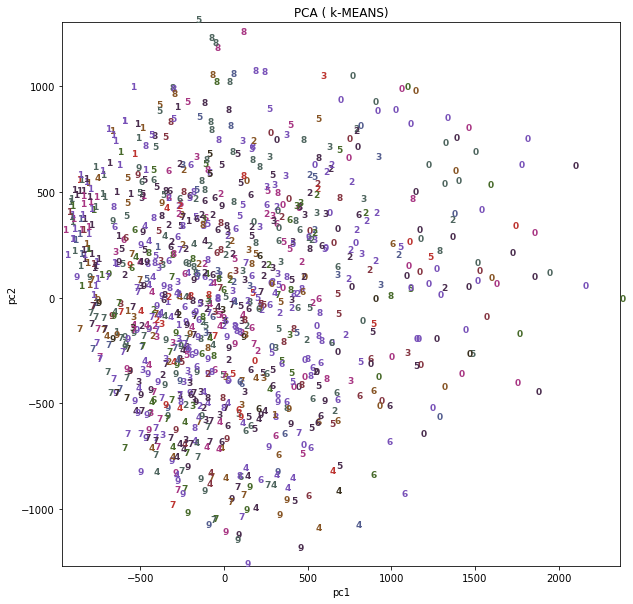

In [85]:
plt.figure(figsize=(10,10))
plt.xlim(test_pca[:,0].min(), test_pca[:,0].max())
plt.ylim(test_pca[:,1].min(), test_pca[:,1].max())
for i in range(len(target_tensor_test)):
    plt.text(test_pca[i,0], test_pca[i,1], str(target_tensor_test[i]),
             color = colors[clusters_km[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA ( k-MEANS)')
plt.xlabel("pc1")
plt.ylabel("pc2")
# plt.text(15, 25, str("k-MEANS time: {}".format(time()-t)),
#          bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#          fontsize=9)
plt.show()

In [86]:
km = KMeans(n_clusters=10, random_state=0)
km = km.fit(train_pca)
labels_km = km.labels_
clusters_km = km.predict(test_pca)


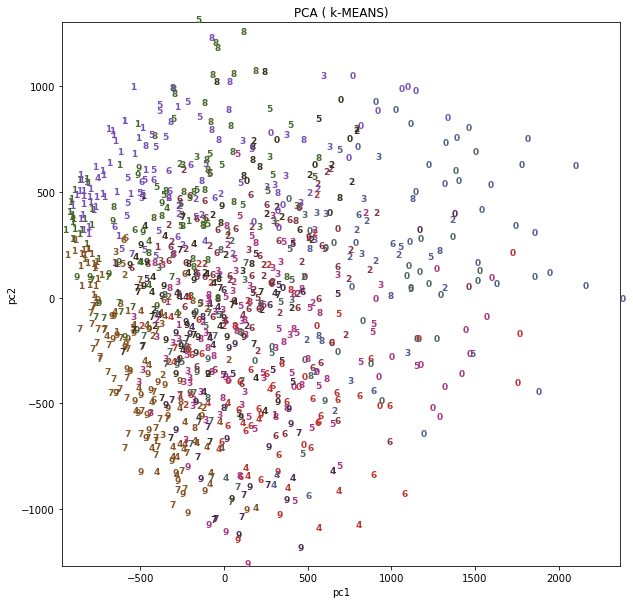

In [88]:
plt.figure(figsize=(10,10))
plt.xlim(test_pca[:,0].min(), test_pca[:,0].max())
plt.ylim(test_pca[:,1].min(), test_pca[:,1].max())
for i in range(len(target_tensor_test)):
    plt.text(test_pca[i,0], test_pca[i,1], str(target_tensor_test[i]),
             color = colors[clusters_km[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA ( k-MEANS)')
plt.xlabel("pc1")
plt.ylabel("pc2")
# plt.text(15, 25, str("k-MEANS time: {}".format(time()-t)),
#          bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#          fontsize=9)
plt.show()

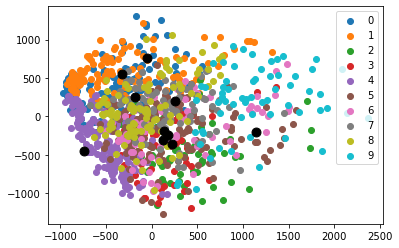

In [89]:
#Getting unique labels
 
u_labels = np.unique(clusters_km)
centroids = km.cluster_centers_
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(test_pca[clusters_km == i , 0] , test_pca[clusters_km == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [90]:
report_trainning=metrics.confusion_matrix(target_tensor_test, clusters_km) # due to batching we need to make this the input to confusion matrix
# sklearn.metrics.confusion_matrix
report_trainning
cm_df_trainning = pd.DataFrame(report_trainning,
                     index = ['0','1','2','3','4','5','6','7','8','9'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm_df_trainning

,0,1,2,3,4,5,6,7,8,9
0,0,13,10,3,0,15,25,4,6,29
1,24,42,0,1,27,2,0,3,1,0
2,1,12,8,1,11,6,2,27,19,10
3,11,9,0,0,8,50,4,1,1,7
4,6,2,15,14,30,0,2,1,15,2
5,18,23,1,10,1,28,11,2,1,5
6,1,9,32,3,6,0,0,51,1,4
7,8,1,1,11,44,0,20,0,21,0
8,35,11,2,2,4,27,4,1,13,6
9,13,0,4,17,35,4,6,0,23,0


In [91]:
print ("Accuracy Score of Kmeans testing set: {:.2f}".format(accuracy_score(target_tensor_test, clusters_km)))
print ("ARI of Kmeans testing set: {:.2f}".format(adjusted_rand_score(target_tensor_test, clusters_km)))

Accuracy Score of Kmeans testing set: 0.12
ARI of Kmeans testing set: 0.13


In [92]:
km_5 = KMeans(n_clusters=5, random_state=0)
km_5 = km_5.fit(train_pca)
labels_km_5 = km_5.labels_
clusters_km_5 = km_5.predict(test_pca)

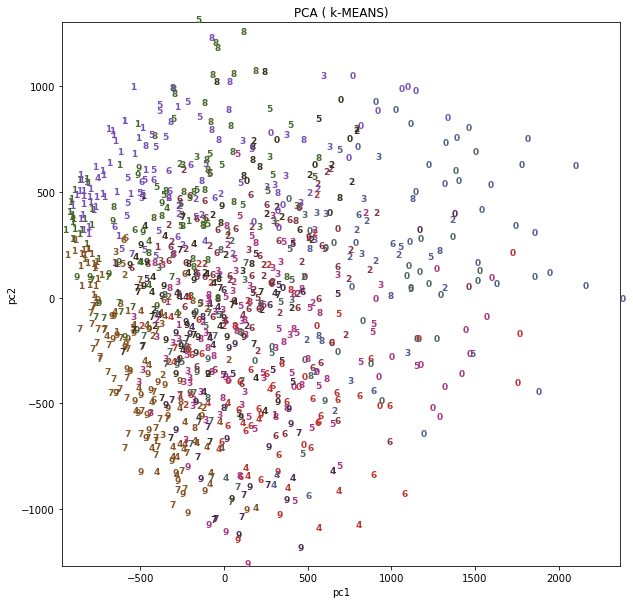

In [93]:
plt.figure(figsize=(10,10))
plt.xlim(test_pca[:,0].min(), test_pca[:,0].max())
plt.ylim(test_pca[:,1].min(), test_pca[:,1].max())
for i in range(len(target_tensor_test)):
    plt.text(test_pca[i,0], test_pca[i,1], str(target_tensor_test[i]),
             color = colors[clusters_km[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA ( k-MEANS)')
plt.xlabel("pc1")
plt.ylabel("pc2")
# plt.text(15, 25, str("k-MEANS time: {}".format(time()-t)),
#          bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#          fontsize=9)
plt.show()

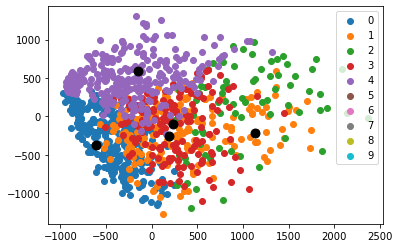

In [94]:
#Getting unique labels
 
u_labels_5 = np.unique(clusters_km_5)
centroids_5 = km_5.cluster_centers_
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(test_pca[clusters_km_5 == i , 0] , test_pca[clusters_km_5 == i , 1] , label = i)
plt.scatter(centroids_5[:,0] , centroids_5[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [95]:
report_trainning=metrics.confusion_matrix(target_tensor_test, clusters_km_5) # due to batching we need to make this the input to confusion matrix
# sklearn.metrics.confusion_matrix
report_trainning
cm_df_trainning = pd.DataFrame(report_trainning,
                     index = ['0','1','2','3','4','5','6','7','8','9'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm_df_trainning

,0,1,2,3,4,5,6,7,8,9
0,0,46,29,13,17,0,0,0,0,0
1,35,1,0,2,62,0,0,0,0,0
2,15,6,13,44,19,0,0,0,0,0
3,8,56,7,1,19,0,0,0,0,0
4,50,0,4,21,12,0,0,0,0,0
5,1,50,3,2,44,0,0,0,0,0
6,11,1,8,71,16,0,0,0,0,0
7,84,3,0,3,16,0,0,0,0,0
8,6,28,6,3,62,0,0,0,0,0
9,78,6,5,4,9,0,0,0,0,0


In [96]:
print ("Accuracy Score of Kmeans testing set: {:.2f}".format(accuracy_score(target_tensor_test, clusters_km_5)))
print ("ARI of Kmeans testing set: {:.2f}".format(adjusted_rand_score(target_tensor_test, clusters_km_5)))

Accuracy Score of Kmeans testing set: 0.03
ARI of Kmeans testing set: 0.16


In [20]:
print(data.describe())
data=pd.DataFrame(data)
data.rename(columns={data.columns[-1]: 'pixel784'}, inplace=784)
labels = list(data['pixel784'])
data = data.iloc[0:,:784]


          0       1       2       3       4       5       6       7       8    \
count  3000.0  3000.0  3000.0  3000.0  3000.0  3000.0  3000.0  3000.0  3000.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

          9    ...          775          776          777     778     779  \
count  3000.0  ...  3000.000000  3000.000000  3000.000000  3000.0  3000.0   
mean      0.0  ...     0.035333     0.046333     0.009333     0.0     0.0   
std       0.0  ...     1.881293     2.5

In [44]:
clf = KMeans(n_clusters=10, n_init=10, max_iter=100)
clf.fit(data)
pred = clf.predict(data)
print(pred)

[7 5 5 ... 5 6 6]


In [46]:
cluster_dict ={}

for i,val in enumerate(pred):
    if(val not in cluster_dict.keys()):
        cluster_dict[val]= []
    cluster_dict[val] = cluster_dict[val] + [i]

print(cluster_dict.keys())


dict_keys([7, 5, 6, 8, 4, 9, 2, 3, 1, 0])


In [23]:
sum1 = 0
err = []
for j in cluster_dict.keys():

    lis = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in cluster_dict[j]:
        lis[labels[i]] = lis[labels[i]]+1
    print('cluster:', lis.index(max(lis)))
    print(lis)
    print(sum(lis),'sum')
    print(max(lis))
    sum1 = sum1 + sum(lis) -max(lis)
    err = err +[(max(lis)/sum(lis))]
    print(sum1)
    print(sum(lis)-max(lis))

print(sum1/3000,'error')

print(adjusted_rand_score(labels,pred))

print((1 - (sum(err)/len(err))))

cluster: 0
[228, 0, 0, 1, 0, 5, 1, 1, 2, 3]
241 sum
228
13
13
cluster: 7
[2, 2, 1, 1, 97, 42, 1, 192, 9, 108]
455 sum
192
276
263
cluster: 6
[11, 1, 18, 0, 7, 4, 125, 0, 2, 2]
170 sum
125
321
45
cluster: 3
[10, 1, 17, 199, 0, 73, 1, 0, 48, 2]
351 sum
199
473
152
cluster: 8
[7, 1, 11, 32, 0, 83, 1, 1, 184, 6]
326 sum
184
615
142
cluster: 6
[39, 0, 7, 2, 7, 27, 146, 0, 5, 0]
233 sum
146
702
87
cluster: 1
[1, 121, 31, 14, 14, 43, 9, 14, 23, 6]
276 sum
121
857
155
cluster: 2
[2, 0, 188, 11, 2, 1, 0, 3, 3, 2]
212 sum
188
881
24
cluster: 1
[0, 174, 22, 29, 6, 2, 15, 20, 11, 13]
292 sum
174
999
118
cluster: 4
[0, 0, 5, 11, 167, 20, 1, 69, 13, 158]
444 sum
167
1276
277
0.42533333333333334 error
0.340186706898898
0.38414767951461815
